<a href="https://colab.research.google.com/github/pbelousova/471_Ministry_of_silly_plots/blob/main/471Replot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Plotting the data for Fig. 3: Temperature evolution of lattice pinned charge-stripe order in La_1.88Sr_0.12CuO_4 for the measured data at the temperature 46 K. 

part of the Fig. 3-e

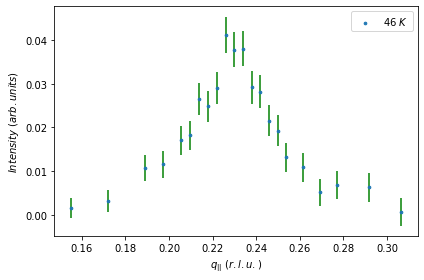

In [33]:
plt.rcParams["figure.autolayout"] = True


url46 = 'https://raw.githubusercontent.com/pbelousova/471_Ministry_of_silly_plots/main/46K.csv'
K46 = pd.read_csv(url46)

K46['x'] = K46['q_parallel']
K46['y'] = K46['Intensity']
K46["e46"] = K46["errorbar"]

plt.errorbar(K46['x'], K46['y'], K46['e46'], ls='', color='g')
plt.scatter(K46['x'], K46['y'], label=r'$46 \ K$', s=7, zorder=1000)


#plt.title('...')
plt.xlabel('$q_{||} \ (r.l.u.)$')
plt.ylabel('$Intensity \ (arb. units)$')
plt.legend(loc='upper right')

plt.show()

# Fitting Lorentzian distribution to the data measured at the temperature of 46 K.

*   popt = optimal parameters
*   pcov = error matrix (sort of)
*   p0 = initial parameters eyeballed from the graph

Optimized parameters amplitude, peak, width: [0.03803153 0.22936514 0.0197398 ]
Error on optimized parameters amplitude, peak, width: [0.03803153 0.22936514 0.0197398 ]


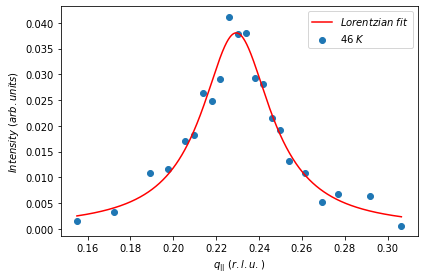

In [34]:
def Lorentzian(f, a, mu, sigma): #a=amplitude, mu=peak, sigma=width
    return (a*sigma**2/((f-mu)**2+sigma**2))

popt, pcov = curve_fit(Lorentzian, K46['x'], K46['y'], p0=[0.04, 0.23, 0.05]) 
print('Optimized parameters amplitude, peak, width:', popt)

aopt, muopt, sigmaopt = popt
x_mod = np.linspace(min(K46['x']), max(K46['x']), 1000)
y_mod = Lorentzian(x_mod, aopt, muopt, sigmaopt)

#approximate errors on parameters (only from datapoints, errorbars are not accounted for yet)
np.sqrt(np.diag(pcov))
print('Error on optimized parameters amplitude, peak, width:', popt)

plt.scatter(K46['x'], K46['y'], label=r'$46 \ K$')
plt.plot(x_mod, y_mod, label=r'$Lorentzian \ fit$', color='r')

#plt.title('...')
plt.xlabel('$q_{||} \ (r.l.u.)$')
plt.ylabel('$Intensity \ (arb. units)$')
plt.legend(loc='upper right')

plt.show()


Adding errorbars to the data at 46 K provided in the same .csv file will give the most likely values for the Lorentzian fit parameters - amplitude, mean (peak value), and sigma (width of the distribution)


Most probable optimized parameters amplitude, peak, width: [0.03803153 0.22936514 0.0197398 ]
Error on most probable optim-d par-s amplitude, peak, width: [0.03764673 0.22930139 0.02001342]


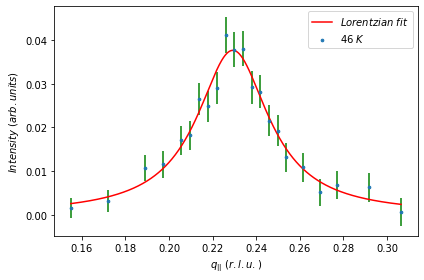

In [35]:
# most probable optimized parameters (accounting for the errorbars)
popt_better, pcov_better = curve_fit(Lorentzian, K46['x'], K46['y'], sigma=K46['e46'], p0=[0.04, 0.23, 0.05]) 
print('Most probable optimized parameters amplitude, peak, width:', popt)

aopt_better, muopt_better, sigmaopt_better = popt_better
x_mod_better = np.linspace(min(K46['x']), max(K46['x']), 1000)
y_mod_better = Lorentzian(x_mod_better, aopt_better, muopt_better, sigmaopt_better)

np.sqrt(np.diag(pcov_better))
print('Error on most probable optim-d par-s amplitude, peak, width:', popt_better)

plt.errorbar(K46['x'], K46['y'], K46['e46'], ls='', color='g')
plt.scatter(K46['x'], K46['y'], label=r'$46 \ K$', s=7, zorder=1000)
plt.plot(x_mod_better, y_mod_better, label=r'$Lorentzian \ fit$', color='r')

#plt.title('...')
plt.xlabel('$q_{||} \ (r.l.u.)$')
plt.ylabel('$Intensity \ (arb. units)$')
plt.legend(loc='upper right')

plt.show()